# Dampened Pendulum Simulation

I will analyze the equation for damped oscillation for a pendulum. Additionally, I will expand this understanding by modeling this system in real time with python so that viewers are able to visualize and manipulate what happens to dampened systems.

### Free Body Diagram

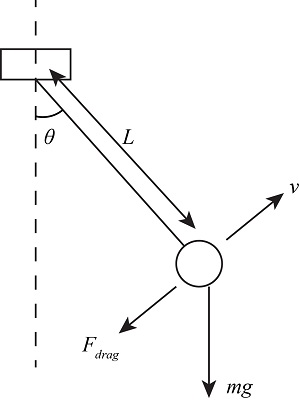

There are forces down on the object that are due to the gravitiational field and forces along the string (tension) keeping the object attached. Also shown is the direction of the object as it swings--in this case, to the right. The only difference in this system than simple harmonic oscillators is the inclusion of air resistance/drag, which opposes the motion of the object.
It also acts in the $\hat{\theta}$ direction.
Generally,
\begin{equation}
F_{drag} = -bL\dot{\theta} = -b\dot{x}
\end{equation}

where we have introduced the dot notation to refer to the derivative being taken with respect to time. It is clear that the drag opposes the direction of motion for the pendulum. Here we assume that drag is linearly proportional to our pendulum's speed. 'L' is still the length of the pendulum, and 'b' is just some constant that tells us how strong the drag force is--it would depend on things such as the density of the air your pendulum is swinging through.

Setting up Newton's Second Law,
\begin{equation}
\sum{F} = ma = -mgsin{\theta} - bv
\end{equation}
Using the fact that a = L$\alpha$ and v = L$\omega$
\begin{equation}
mL\ddot{\theta} = -mgsin(\theta) - bL\dot{\theta}
\end{equation}
\begin{equation}
mL\ddot{\theta} + bL\dot{\theta} + mgsin(\theta) = 0
\end{equation}
\begin{equation}
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{L}sin(\theta) = 0
\end{equation}

consider the damped pendulum using the small angle approximation sin($\theta) = \theta. The governing equation becomes the linear, second-order, homogeneous differential equation given by
\begin{equation}
\ddot{\theta} + \frac{b}{m}\dot{\theta} + \frac{g}{L}\theta = 0
\end{equation}
We can also say
\begin{equation}
\ddot{x} + \frac{b}{m}\dot{x} + \frac{g}{L}x = 0
\end{equation}

We can use the fact the $\omega_0^{2}$ = $\frac{g}{L}$ (this is our resonant frequency squared) and call $\gamma$ = $\frac{b}{2m}$

\begin{equation}
\ddot{x} + 2\gamma\dot{x} + \omega_0^{2}x = 0
\end{equation}

This is a second order homogeneous differential equation with roots 
\begin{equation}
r = -\gamma \pm \sqrt{\gamma^{2} - \omega_0^{2}}
\end{equation}

There are different situations for our dampened system: <br> overdampened when $\gamma^{2} - \omega_0^{2}$ > 0 <br> critcally dampened when $\gamma^{2} - \omega_0^{2}$ = 0 <br> and underdampened when $\gamma^{2} - \omega_0^{2}$ < 0.

For our case, we are only interested in the underdampened case because we know the pendulum is not stopping right when it reaches the bottom of its trajectory and because it takes a long time for the system to stop. <br> Therefore, we are interested in the underdampened case. We can write the roots of our equation as <br> \begin{equation}
r = -\gamma \pm \omega^{'}i
\end{equation}
<br>
where $\omega^{'}$ = $\sqrt{\gamma^{2} - \omega_0^{2}}$ when $\gamma$ < $\omega_0$

Finally, the solution to our equation becomes
\begin{equation}
x(t) = Ae^{(-\gamma)t}cos(\omega^{'}t)
\end{equation}
<br> *because we assume we start at t=0 and start recording the pendulum at the beginning, at its maximum amplitude.

First, I need to import packages I will be using. I opted to use matplotlib's animation feature.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib
from matplotlib.animation import FFMpegWriter

**I was considering FFMpegWriter, but I was not as confident with this tool. I found the animation guides from previous years' demos helpful and a few examples did not use the ffmpeg directly. Maybe for another iteration of this project, or if I had more time to learn how to use it, I would implement this feature.

Here, I initialize my conditions. These values can change, but I just opted for simple values. If my mass or drag coefficient were altered, I would be able to achieve different dampened curves, as I describe above.

In [2]:
m = 1                    # kg (bob mass)
L = 1                    # m (pendulum lenth)
g = 9.81                 # m/s/s
b = 0.35                 # drag coefficient
omega_0 = np.sqrt(g/L)   # resonant frequency
theta_0 = np.radians(60) # deg to rad (initial angular displacement)
x_0 = L*np.sin(theta_0)  # initial x position 
y_0 = -L*np.cos(theta_0)
gamma = b/(2*m)
t_0 = 0.0                # initial time start (s)
t_f = 25.0               # final time
v_0 = 0                  # initial (tangential) velocity start (m/s)
dt = 0.05                # time step
x_points = [x_0]         # prepare array for angle data
v_points = [v_0]         # prepare array for vel data
y_points = []
theta_points = [theta_0]

In [3]:
#I was just testing the shapes of these arrays so I could plot them successfully
#print(v_points.shape)
#print(x_points.shape)
#print(t_points.shape)

This is where I established my function for the position versus time of the pendulum. I set up a domain that represents how long the pendulum will swing for and split up these points by small incriments of dt. For my function, I had trouble using the actual derived equation I found due to my omega prime value not existing in the realm of real numbers (or at least that's what I believe the issue was). Instead, I define new points for the positions, velocities, and angles, on my second order differential equation of motion and use Euler's method to help determine the new values.

In [4]:
t_points = np.arange(t_0,t_f, dt)

def func(t_points, x_points, v_points, theta_points):
    for i in range(len(t_points)):
        #new velocity, using Euler's method basically (I am using the equation of motion above to help solve for new velocities)
        v_new = v_points[i] + dt*(-2*gamma*v_points[i]-omega_0**2*x_points[i])
        #new x position with given new velocity
        x_new = x_points[i] + dt*v_new
        #new theta
        theta_new = theta_points[i] + dt * (v_new / L)
        #update our conditions
        v_points.append(v_new)
        x_points.append(x_new)
        theta_points.append(theta_new)
    return x_points, v_points, theta_points
x_data, v_data, theta_data = func(t_points, x_points, v_points, theta_points)
x_data = np.array(x_data)
v_data = np.array(v_data)
theta_data = np.array(theta_data)

#find the y positions of the pendulum
def y(t_points,x_data,theta_data):
    for i in range(len(t_points)):
        #y_new = -L*np.cos(theta_data[i])
        y_new = -np.sqrt(L**2 - x_data[i]**2)
        y_points.append(y_new)
    return y_points
y_data = y(t_points,x_data,theta_data)
y_data = np.array(y_data)
#print(y_data[:10])
#print(x_data[:10])

#Testing the plot of my graph to make sure it is was I expect
#plt.figure()
#plt.plot(t_points,x_data)
#plt.show()

Below is a test of animating the curve.

In [5]:
#fig, ax = plt.subplots()
#curve, = ax.plot([], [])
#ax.set_xlim(t_0, t_f)
#ax.set_ylim(-x_0, x_0)
#ax.set_xlabel('time (s)')
#ax.set_ylabel('position (m)')

#def animate(i):
    #curve.set_data(t_points[:i], x_data[:i])

#Animate once (set repeat=False so the animation doesn't loop).
#interval: Interval between frames in ms
#frames = 1000*dt: total number of frames to use.
#ani = animation.FuncAnimation(fig, animate, frames=int(t_f/dt), interval=1000*dt, repeat=False)
#ani

Finally, I create a plot to house my animations. I include the graph/curve and the pendulum systems.

<IPython.core.display.Javascript object>


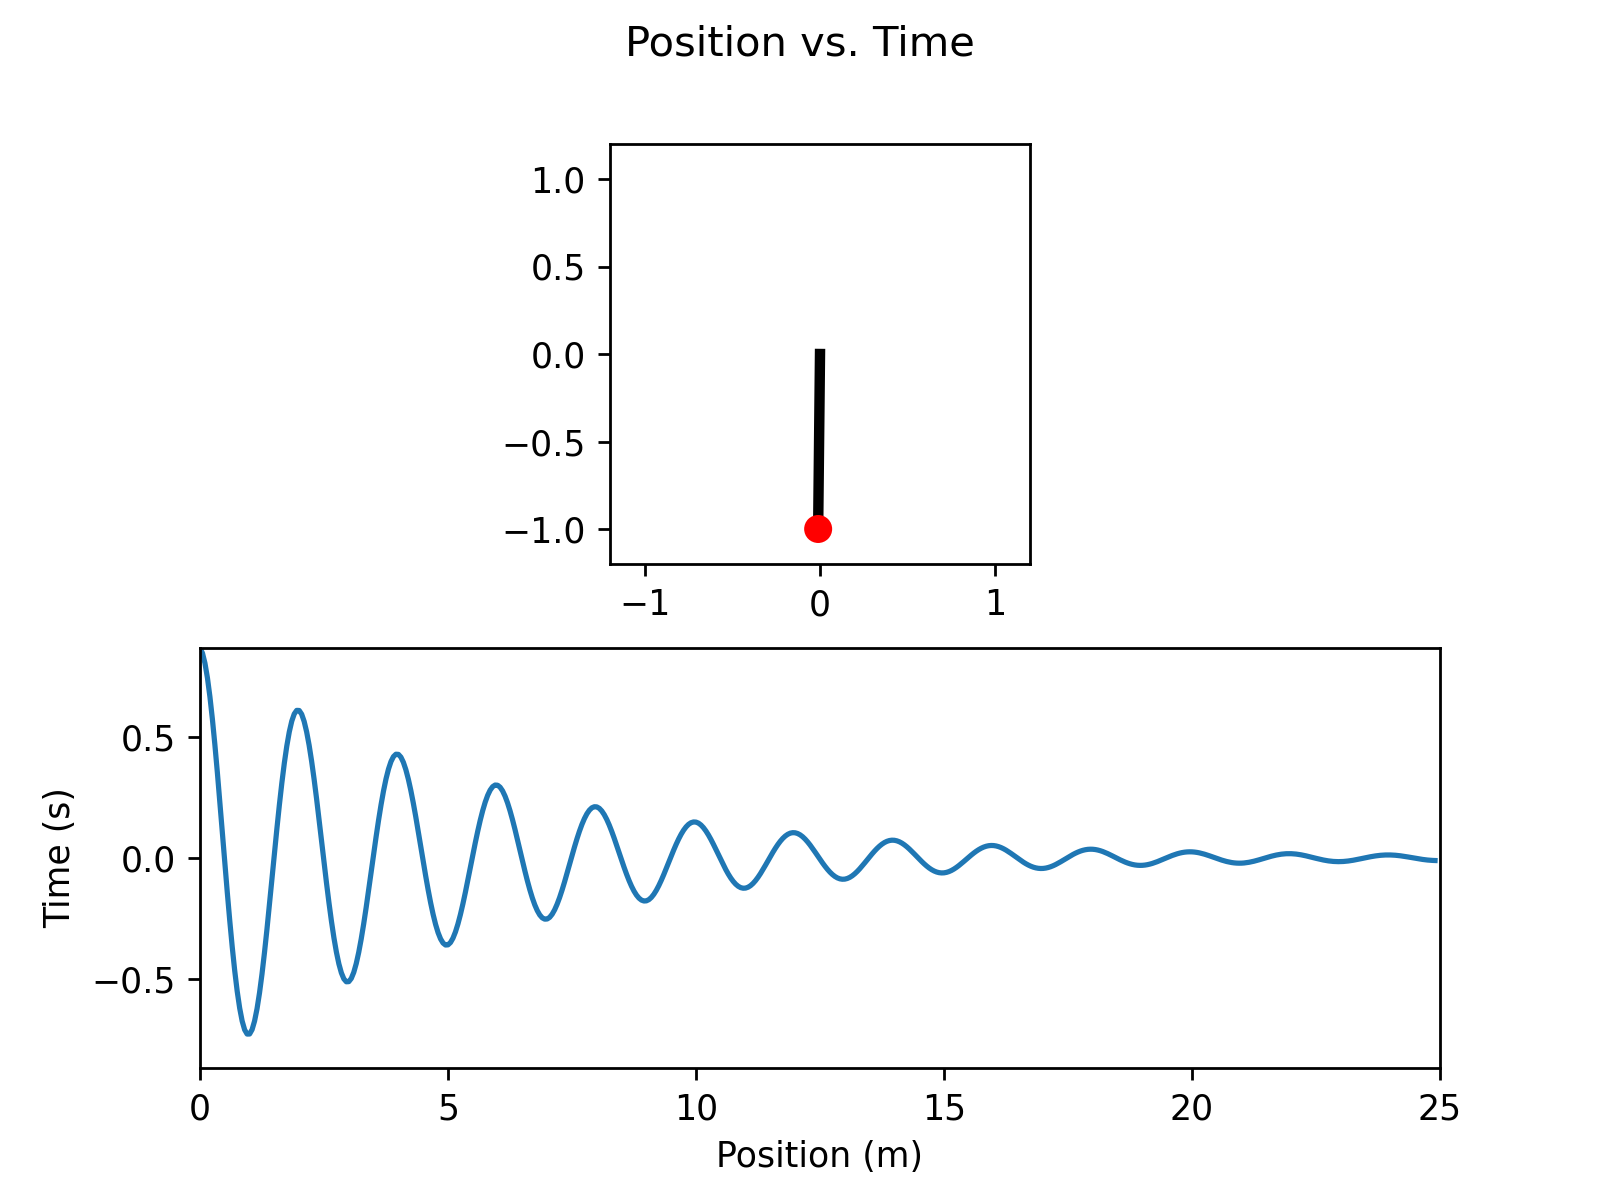

C:\Users\ztsch\AppData\Local\Temp\ipykernel_33780\4156549202.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax_pend = plt.subplot(2,1,1, aspect='equal') #trying to make this the first plot, want it to have a square shape, will be for the pendulum


In [6]:
#start with an empty plot that has two subplots in a 2 x 1
fig,ax = plt.subplots(2,1)

ax_pend = plt.subplot(2,1,1, aspect='equal') #trying to make this the first plot, want it to have a square shape, will be for the pendulum
ax_plot = plt.subplot(2,1,2) #making this the bottom graph, will be for the position vs. time plot

curve, = ax_plot.plot([],[]) #the curve of the graph in its initial position
string, = ax_pend.plot([],[], lw=3, c='black') #string of pendulum
bob = ax_pend.add_patch(plt.Circle((x_0,y_0), 0.08, fc='r', zorder=3))

ax_pend.set_xlim(-L*1.2, L*1.2) #the scaling is arbirtrary, I just want enought room to see the pendulum
ax_pend.set_ylim(-L*1.2, L*1.2) #same idea, intended to be a square
ax_plot.set_xlim(0, 25) #time domain
ax_plot.set_ylim(-x_0,x_0) #max amplitude of pendulum
plt.suptitle('Position vs. Time')
ax_plot.set_xlabel("Position (m)")
ax_plot.set_ylabel('Time (s)')

#string, = ax_pend.plot([0, L*np.sin(theta_points[i])], [0,-L*np.cos(theta_points[i])], color='black',lw=3)
#bob, = ax_pend.plot(L*np.sin(theta_points[i]),-L*np.cos(theta_points[i]),'o',markersize=22,color="darkturquoise",zorder=100)

def animate(i):
    curve.set_data(t_points[:i], x_data[:i])
    string.set_data([0,x_data[i]],[0,y_data[i]])
    bob.set_center((x_data[i],y_data[i]))

#Animate once (set repeat=False so the animation doesn't loop).
metadata = dict(title='Dampened Pendulum', artist='Zack Schuder') #making descriptive metadata
writer = FFMpegWriter(fps=60, metadata=metadata, bitrate=200000)
ani = FuncAnimation(fig, animate, frames=int(t_f/dt), interval=1000*dt, repeat=False)
ani.save('dampPend.mp4')

In [ ]:
#testing the pendulum plot/animation

#fig, ax = plt.subplots()
#ax.set_xlim(-2*L, 2*L)
#ax.set_ylim(-2*L, 2*L)
#ax.set_xlabel('time (s)')
#ax.set_ylabel('position (m)')
#ax.set_title('Dampened Pendulum Animation')
#ax.set_aspect('equal')
#graph = ax.plot([0, x_0], [0, y_0], lw=2, color='grey')[0]
#bob = ax.add_patch(plt.Circle((x_0,y_0), 0.08, color='red', zorder=2)